In [82]:
import pandas as py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score

In [83]:
datasts_dir = "./datasets/"
insurance_data = py.read_csv(datasts_dir + "insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [84]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [85]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [86]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-87-cab0803ba1fc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


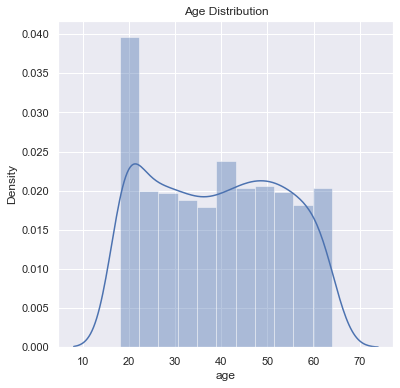

In [87]:
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

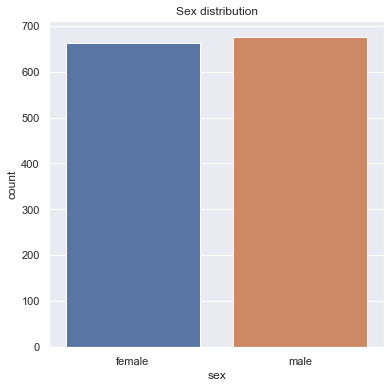

In [88]:
# gneder
plt.figure(figsize=(6, 6))
sns.countplot(x="sex", data=insurance_data)
plt.title('Sex distribution')
plt.show()

<ipython-input-89-cc5ec870018c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


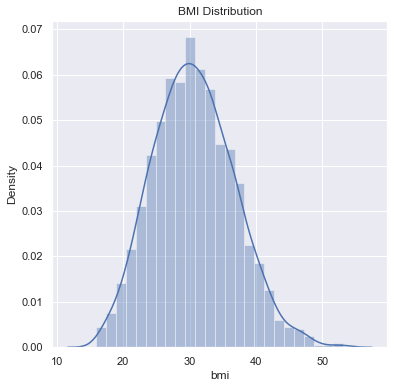

In [89]:
# bmi distribution
plt.figure(figsize=(6, 6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

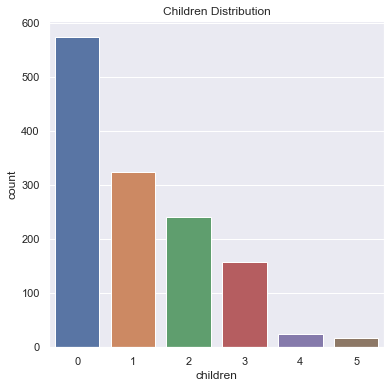

In [90]:
# children distribution
plt.figure(figsize=(6, 6))
sns.countplot(x="children", data=insurance_data)
plt.title('Children Distribution')
plt.show()

In [91]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<ipython-input-92-222b65602528>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


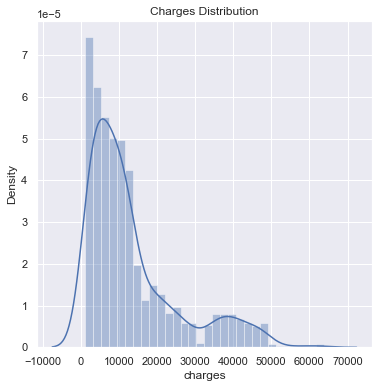

In [92]:
# charges distribution
plt.figure(figsize=(6, 6))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

In [93]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
insurance_data.replace({"sex": {"male": 1, "female": 0}, "smoker": {"yes": 1, "no": 0}, "region": {"southeast": 0, "southwest": 1, "northeast": 2, "northwest": 3}}, inplace=True)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [95]:
X = insurance_data.drop(columns="charges")
Y = insurance_data["charges"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [96]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [97]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = model.score(X_test, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7447273869684077


In [98]:
# accuracy on train data
X_train_prediction = model.predict(X_train)
train_data_accuracy = model.score(X_train, Y_train)
print('Accuracy on train data : ', train_data_accuracy)

Accuracy on train data :  0.751505643411174


In [99]:
r2_train = r2_score(Y_train, X_train_prediction)
print('R2 score on train data : ', r2_train)

r2_test = r2_score(Y_test, X_test_prediction)
print('R2 score on test data : ', r2_test)

R2 score on train data :  0.751505643411174
R2 score on test data :  0.7447273869684077


In [100]:
input_data = (19, 0, 27.900, 0, 1, 1)
prediction = np.array(input_data)
prediction_reshaped = prediction.reshape(1, -1)
result = model.predict(prediction_reshaped)
print(result)


[25597.73941347]


/opt/homebrew/Caskroom/miniconda/base/envs/ai/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
